In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file_path = r'D:\Work\Data Analytics\Project\Competetion\API_BGD_DS2_en_csv_v2_15770.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bangladesh,BGD,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangladesh,BGD,Battle-related deaths (number of people),VC.BTL.DETH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.000000,47.000000,NaN,NaN,2.000000,NaN,2.000000,NaN
2,Bangladesh,BGD,Voice and Accountability: Percentile Rank,VA.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,32.019703,30.049261,30.541872,30.049261,27.184465,26.570047,26.570047,28.019323,28.019323,27.450981
3,Bangladesh,BGD,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,23.905528,23.938111,20.820301,21.484188,22.048898,19.559759,22.257010,27.162699,25.520411,17.176637
4,Bangladesh,BGD,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,62.323794,62.897128,64.068305,57.202109,62.313903,63.578283,67.395621,64.565856,63.537174,67.817057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Bangladesh,BGD,Male pupils below minimum reading proficiency ...,SE.LPV.PRIM.LD.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.000000,NaN
1492,Bangladesh,BGD,Learning poverty: Share of Children at the End...,SE.LPV.PRIM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.220001,NaN
1493,Bangladesh,BGD,"School enrollment, primary (gross), gender par...",SE.ENR.PRIM.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.059628,1.069517,NaN,1.093020,1.018498,NaN,NaN
1494,Bangladesh,BGD,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.000000,62.000000,70.000000,70.000000,71.000000,72.000000,72.000000,74.000000,NaN,NaN


In [5]:
df = df.rename(columns={
    df.columns[0]: "Country Name",
    df.columns[1]: "Country Code",
    df.columns[2]: "Indicator Name",
    df.columns[3]: "Indicator Code"
})

In [6]:
indicators = [
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"
]

In [7]:
df_filtered = df[df["Indicator Name"].isin(indicators)]

In [8]:
df_long = df_filtered.melt(
    id_vars=["Country Name", "Indicator Name"],
    var_name="Year",
    value_name="Value"
)

In [9]:
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")
df_long = df_long.dropna(subset=["Year", "Value"])
df_long = df_long[df_long["Year"].between(1960, 2023)]

In [10]:
df_long

,Country Name,Indicator Name,Year,Value
9,Bangladesh,GDP per capita (current US$),1960.0,82.481277
10,Bangladesh,"Life expectancy at birth, total (years)",1960.0,44.740000
13,Bangladesh,GDP per capita (current US$),1961.0,90.368579
14,Bangladesh,"Life expectancy at birth, total (years)",1961.0,45.662000
17,Bangladesh,GDP per capita (current US$),1962.0,92.589421
...,...,...,...,...
254,Bangladesh,"Life expectancy at birth, total (years)",2021.0,72.381000
257,Bangladesh,GDP per capita (current US$),2022.0,2716.485927
258,Bangladesh,"Life expectancy at birth, total (years)",2022.0,73.698000
259,Bangladesh,Poverty headcount ratio at $2.15 a day (2017 P...,2022.0,5.000000


In [11]:
df_long.isnull().sum()

Country Name      0
Indicator Name    0
Year              0
Value             0
dtype: int64

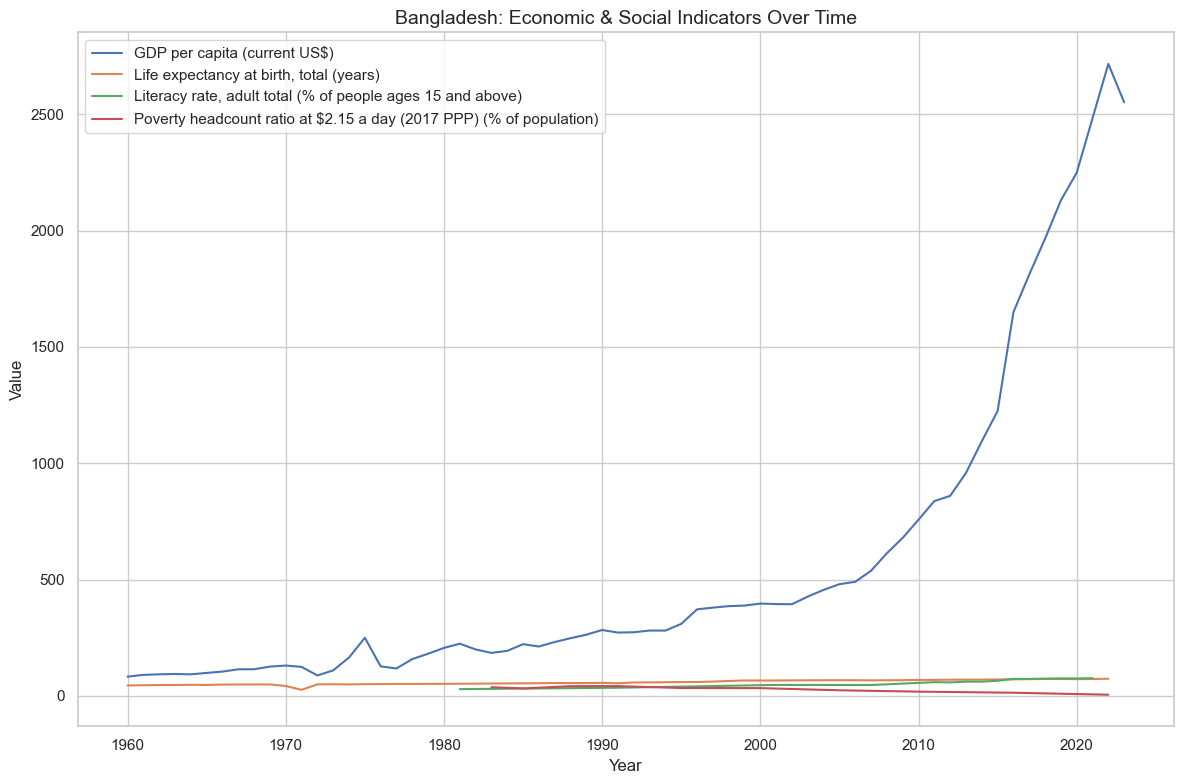

In [12]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for indicator in df_long["Indicator Name"].unique():
    subset = df_long[df_long["Indicator Name"] == indicator]
    plt.plot(subset["Year"], subset["Value"], label=indicator)

plt.title("Bangladesh: Economic & Social Indicators Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

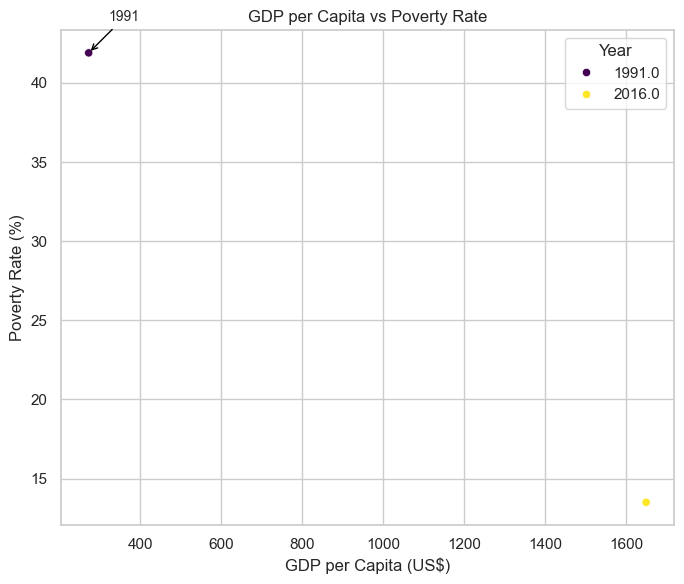

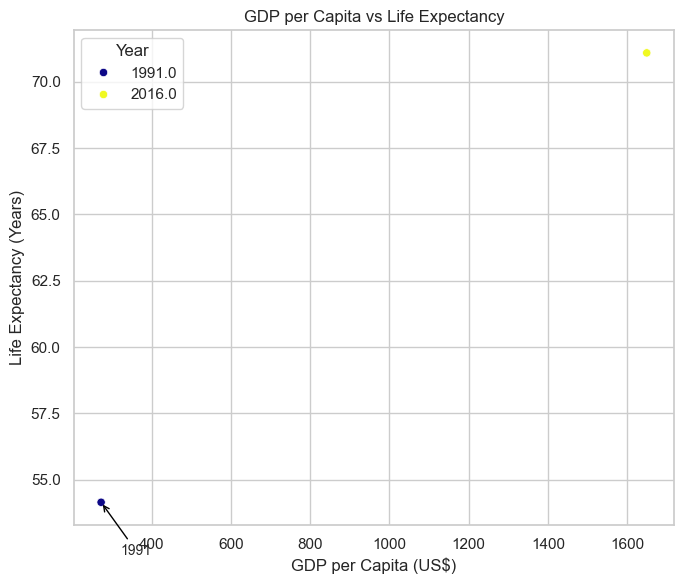

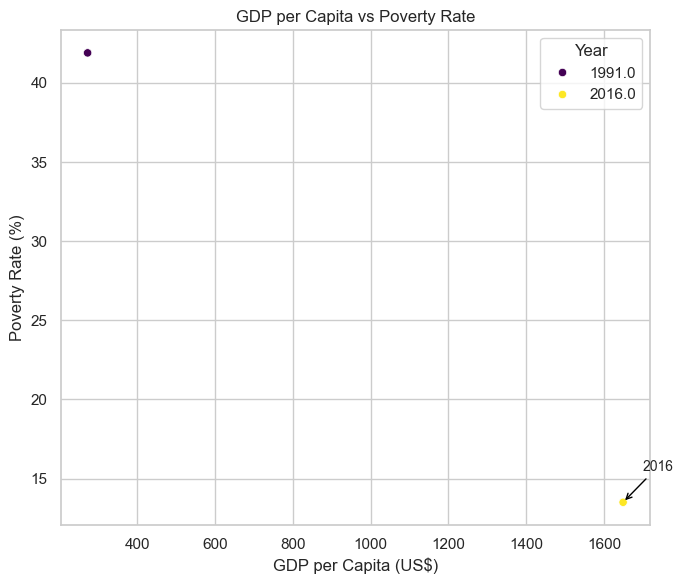

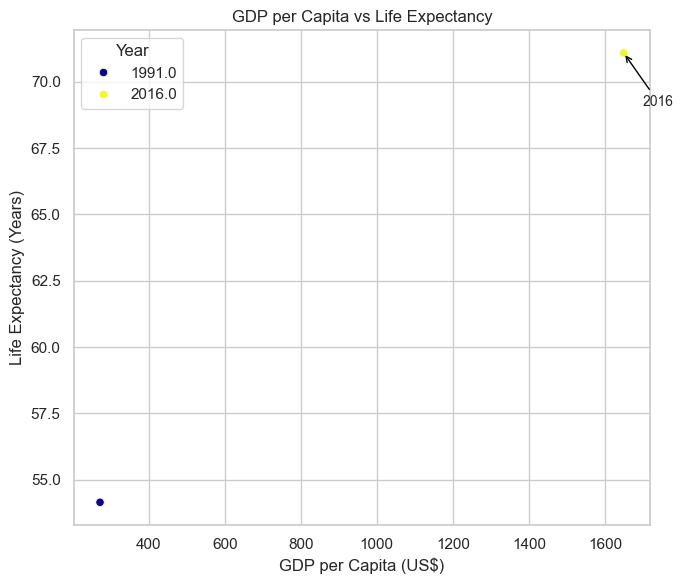

In [13]:
df_wide = df_long.pivot_table(index="Year", columns="Indicator Name", values="Value")

df_wide = df_wide.dropna()
for year in [1991, 2016]:
    x = df_wide.loc[year, "GDP per capita (current US$)"]
    y1 = df_wide.loc[year, "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"]
    y2 = df_wide.loc[year, "Life expectancy at birth, total (years)"]

    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=df_wide,
                    x="GDP per capita (current US$)",
                    y="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",
                    hue=df_wide.index,
                    palette="viridis")
    plt.title("GDP per Capita vs Poverty Rate")
    plt.xlabel("GDP per Capita (US$)")
    plt.ylabel("Poverty Rate (%)")
    plt.annotate(f"{year}", xy=(x, y1), xytext=(x+50, y1+2),
                 arrowprops=dict(arrowstyle="->", color='black'), fontsize=10)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=df_wide,
                    x="GDP per capita (current US$)",
                    y="Life expectancy at birth, total (years)",
                    hue=df_wide.index,
                    palette="plasma")
    plt.title("GDP per Capita vs Life Expectancy")
    plt.xlabel("GDP per Capita (US$)")
    plt.ylabel("Life Expectancy (Years)")
    plt.annotate(f"{year}", xy=(x, y2), xytext=(x+50, y2-2),
                 arrowprops=dict(arrowstyle="->", color='black'), fontsize=10)
    plt.tight_layout()
    plt.show()

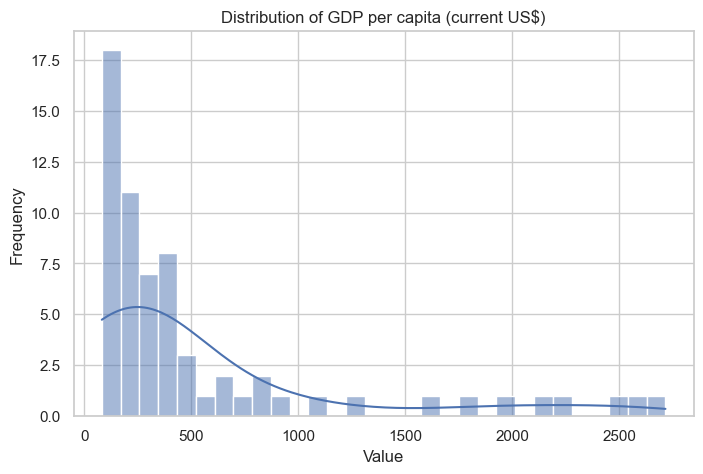

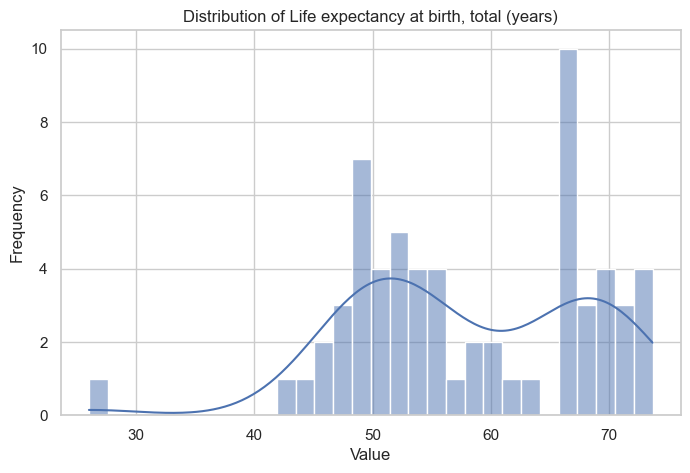

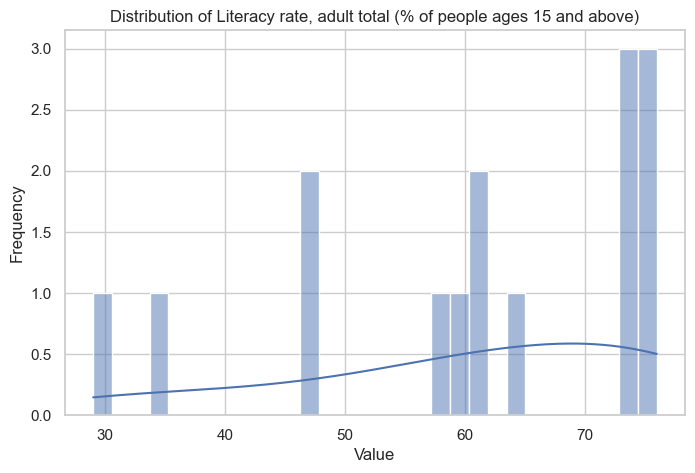

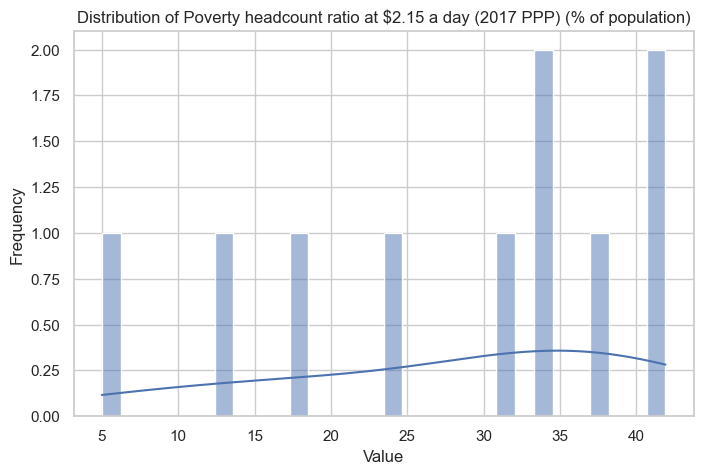

In [14]:
for indicator in df_long["Indicator Name"].unique():
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_long[df_long["Indicator Name"] == indicator], x="Value", bins=30, kde=True)
    plt.title(f"Distribution of {indicator}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [15]:
df_pivot = df_long.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value",
    aggfunc="first"
)

In [16]:
df_pivot.columns = [col for col in df_pivot.columns]

In [17]:
df_transformed = df_pivot.reset_index()

In [18]:
df_transformed

,Country Name,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
0,Bangladesh,1960.0,82.481277,44.740,NaN,NaN
1,Bangladesh,1961.0,90.368579,45.662,NaN,NaN
2,Bangladesh,1962.0,92.589421,46.701,NaN,NaN
3,Bangladesh,1963.0,94.142374,46.655,NaN,NaN
4,Bangladesh,1964.0,92.578298,47.741,NaN,NaN
...,...,...,...,...,...,...
59,Bangladesh,2019.0,2129.798970,72.806,75.0,NaN
60,Bangladesh,2020.0,2248.850788,71.968,75.0,NaN
61,Bangladesh,2021.0,2482.849178,72.381,76.0,NaN
62,Bangladesh,2022.0,2716.485927,73.698,NaN,5.0


In [19]:
df_transformed["GDP per capita (current US$)"] =  df_transformed["GDP per capita (current US$)"].fillna(df_transformed["GDP per capita (current US$)"].mean())
df_transformed["Life expectancy at birth, total (years)"] =  df_transformed["Life expectancy at birth, total (years)"].fillna(df_transformed["Life expectancy at birth, total (years)"].mean())
df_transformed["Literacy rate, adult total (% of people ages 15 and above)"] =  df_transformed["Literacy rate, adult total (% of people ages 15 and above)"].fillna(df_transformed["Literacy rate, adult total (% of people ages 15 and above)"].mean())
df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"] =  df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"].fillna(df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"].mean())

In [20]:
df_transformed.isnull().sum()

Country Name                                                           0
Year                                                                   0
GDP per capita (current US$)                                           0
Life expectancy at birth, total (years)                                0
Literacy rate, adult total (% of people ages 15 and above)             0
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)    0
dtype: int64

In [21]:
df_transformed

,Country Name,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
0,Bangladesh,1960.0,82.481277,44.740000,60.510907,28.06
1,Bangladesh,1961.0,90.368579,45.662000,60.510907,28.06
2,Bangladesh,1962.0,92.589421,46.701000,60.510907,28.06
3,Bangladesh,1963.0,94.142374,46.655000,60.510907,28.06
4,Bangladesh,1964.0,92.578298,47.741000,60.510907,28.06
...,...,...,...,...,...,...
59,Bangladesh,2019.0,2129.798970,72.806000,75.000000,28.06
60,Bangladesh,2020.0,2248.850788,71.968000,75.000000,28.06
61,Bangladesh,2021.0,2482.849178,72.381000,76.000000,28.06
62,Bangladesh,2022.0,2716.485927,73.698000,60.510907,5.00


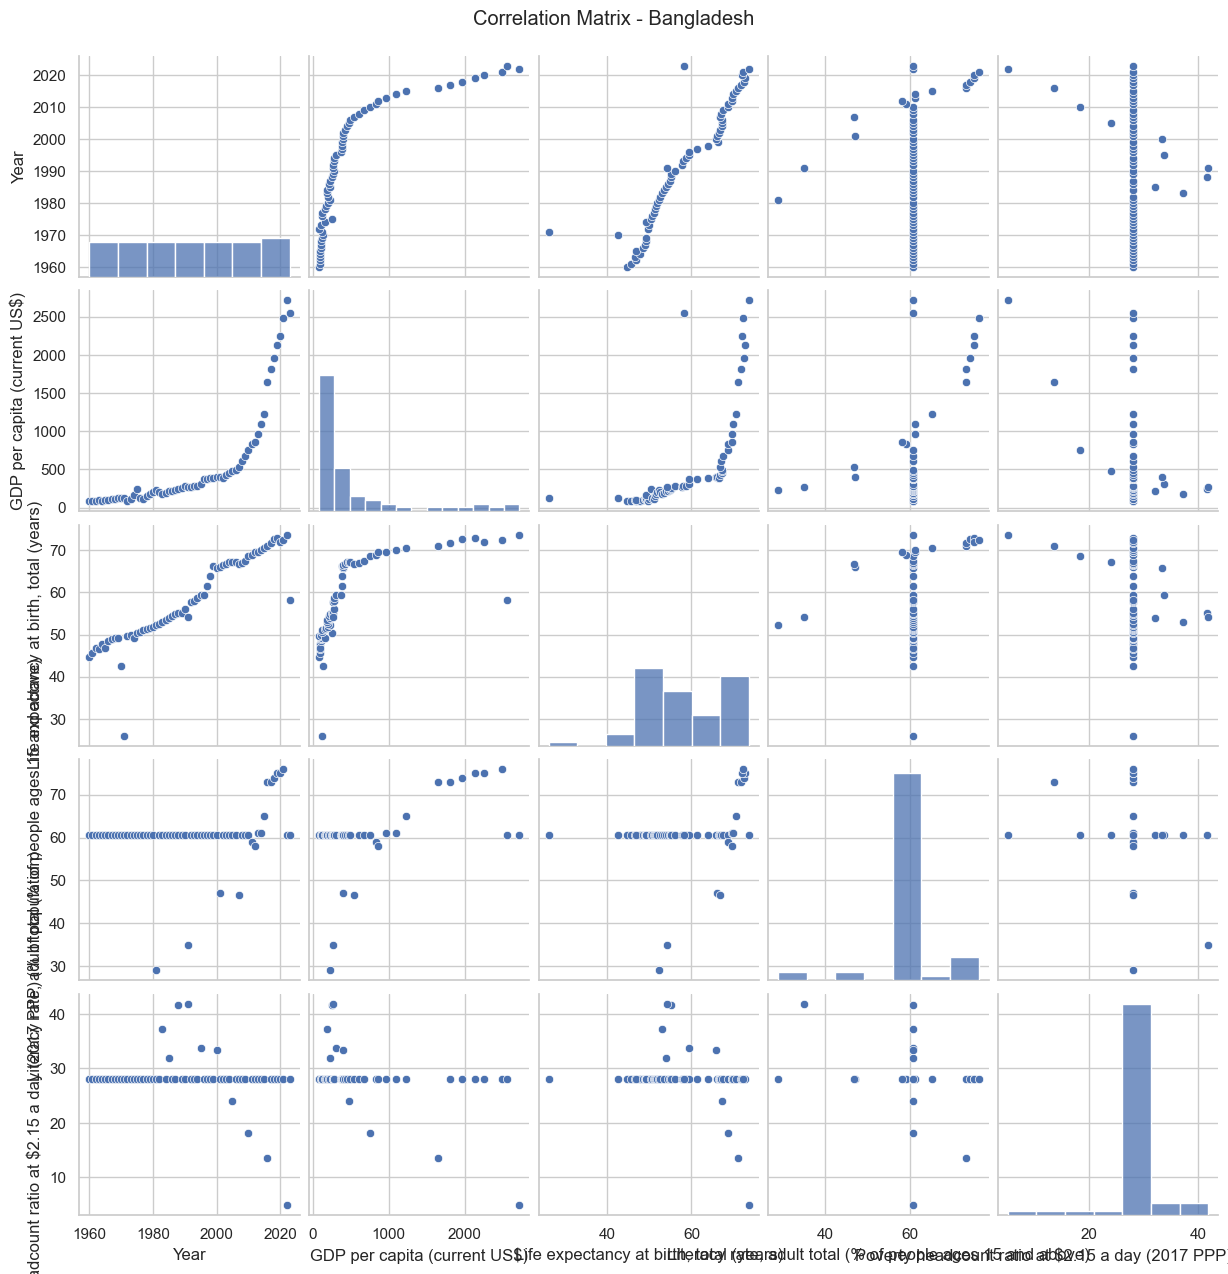

In [22]:
sns.pairplot(df_transformed.dropna())
plt.suptitle(f"Correlation Matrix - Bangladesh", y=1.02)
plt.show()

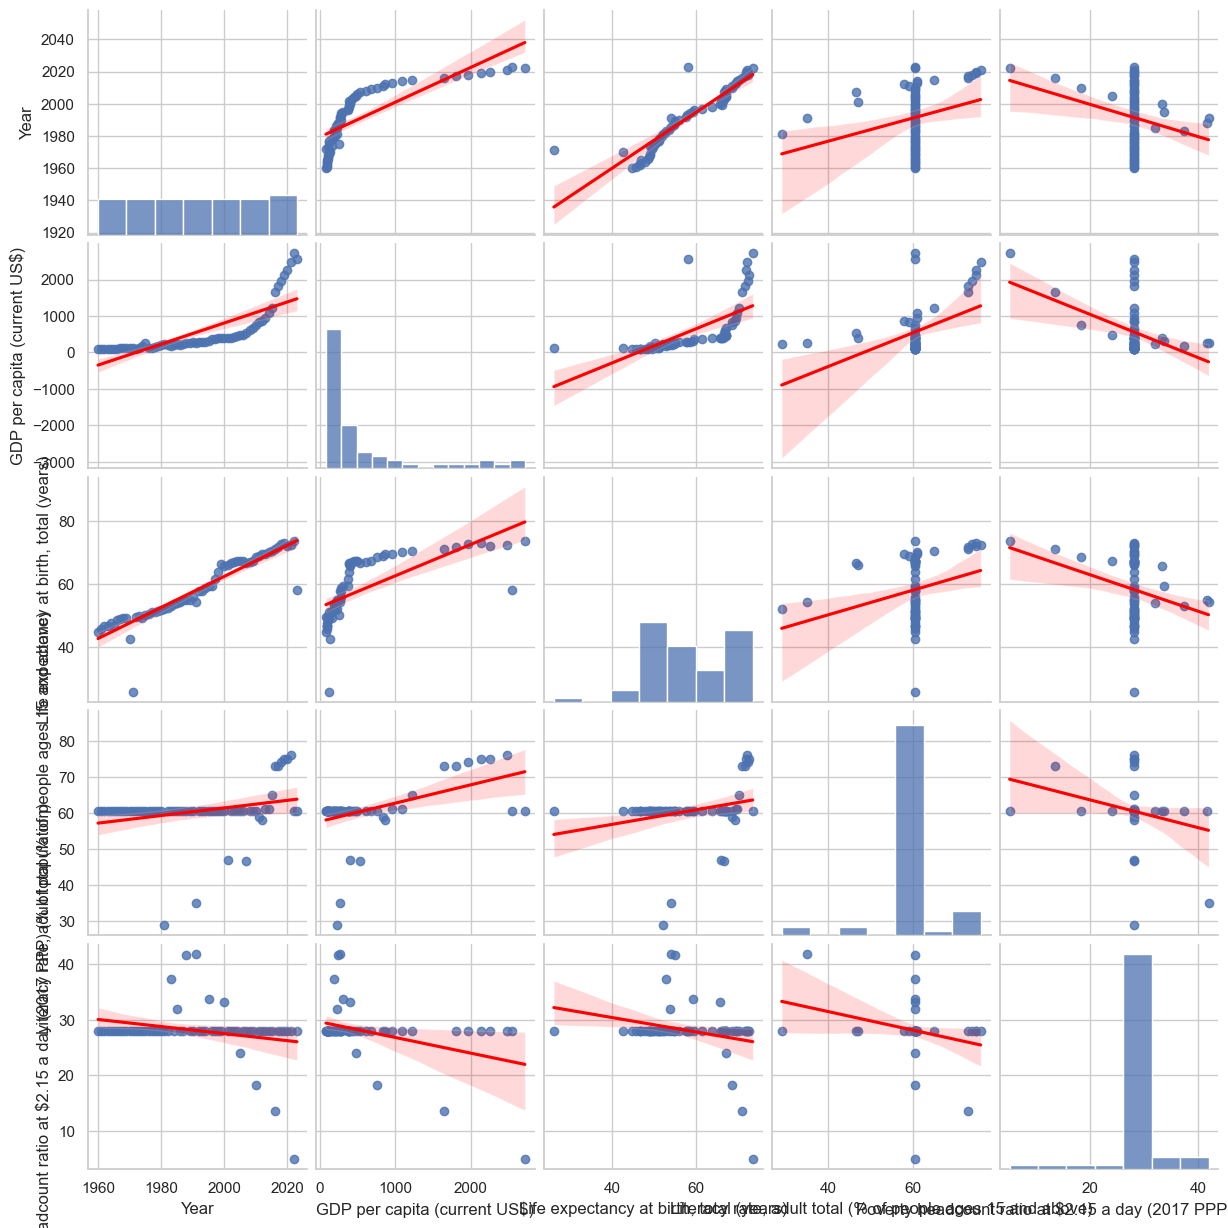

In [23]:
sns.pairplot(df_transformed, kind="reg", plot_kws={'line_kws':{'color':'red'}})

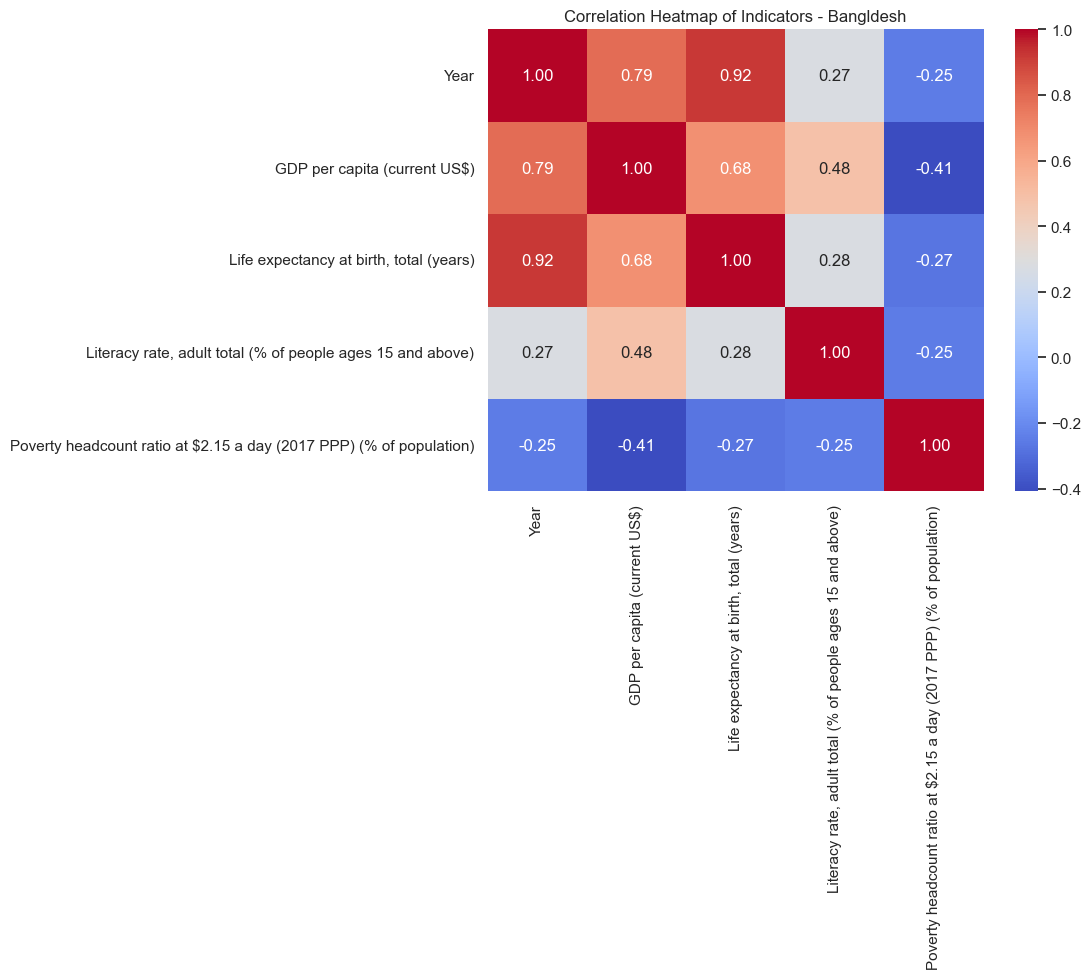

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_transformed.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Heatmap of Indicators - Bangldesh")
plt.show()

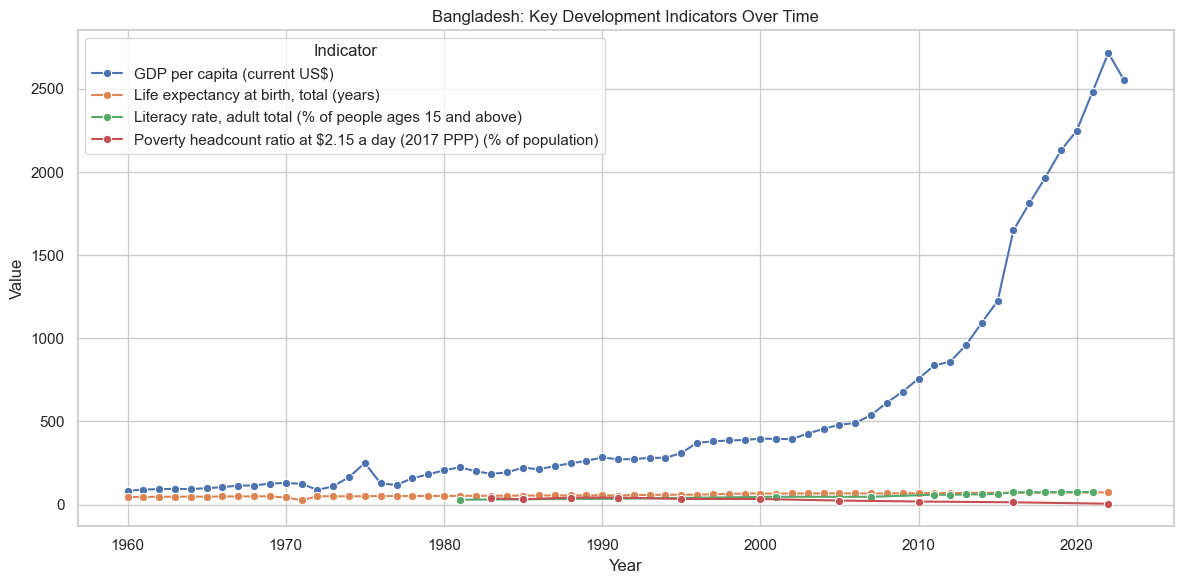

In [25]:
bangladesh = df_long[df_long["Country Name"] == "Bangladesh"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=bangladesh, x="Year", y="Value", hue="Indicator Name", marker='o')

plt.title("Bangladesh: Key Development Indicators Over Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend(title="Indicator")
plt.tight_layout()
plt.show()

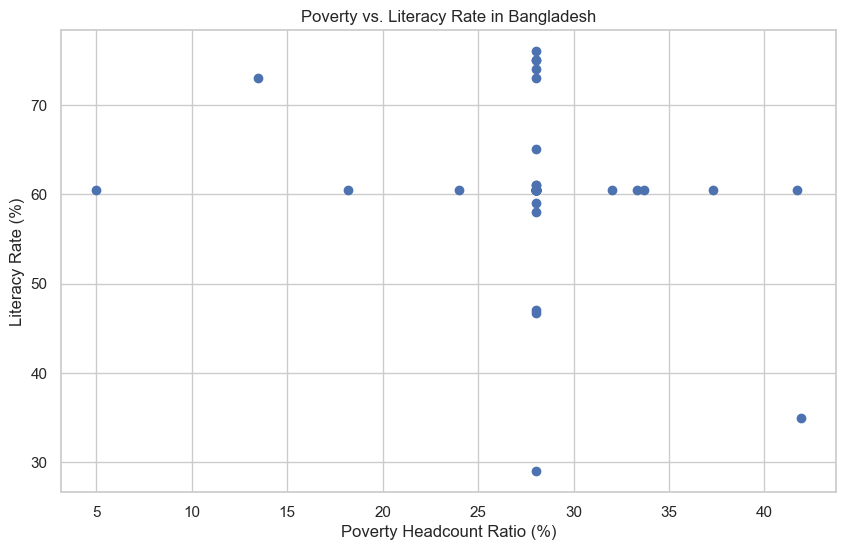

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"], 
            df_transformed["Literacy rate, adult total (% of people ages 15 and above)"])
plt.title("Poverty vs. Literacy Rate in Bangladesh")
plt.xlabel("Poverty Headcount Ratio (%)")
plt.ylabel("Literacy Rate (%)")
plt.show()

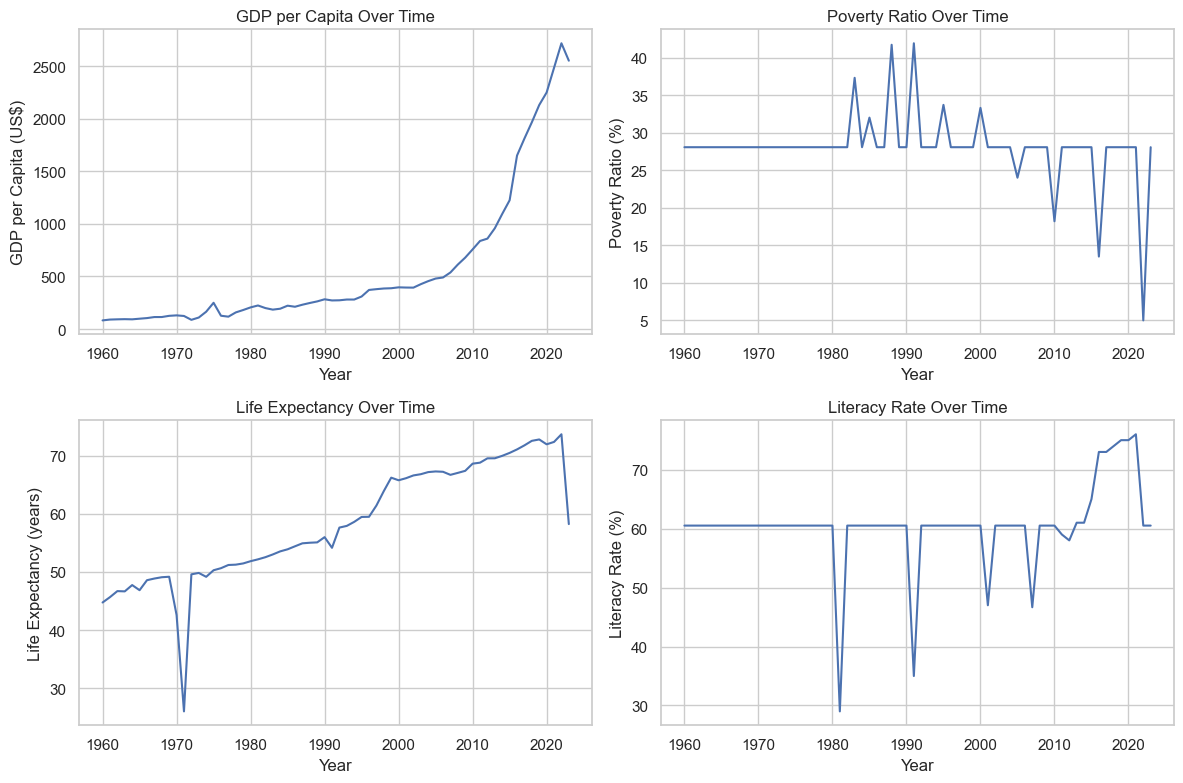

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_transformed["Year"], df_transformed["GDP per capita (current US$)"])
plt.title("GDP per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (US$)")

plt.subplot(2, 2, 2)
plt.plot(df_transformed["Year"], df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"])
plt.title("Poverty Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Poverty Ratio (%)")

plt.subplot(2, 2, 3)
plt.plot(df_transformed["Year"], df_transformed["Life expectancy at birth, total (years)"])
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

plt.subplot(2, 2, 4)
plt.plot(df_transformed["Year"], df_transformed["Literacy rate, adult total (% of people ages 15 and above)"])
plt.title("Literacy Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Literacy Rate (%)")

plt.tight_layout()
plt.show()

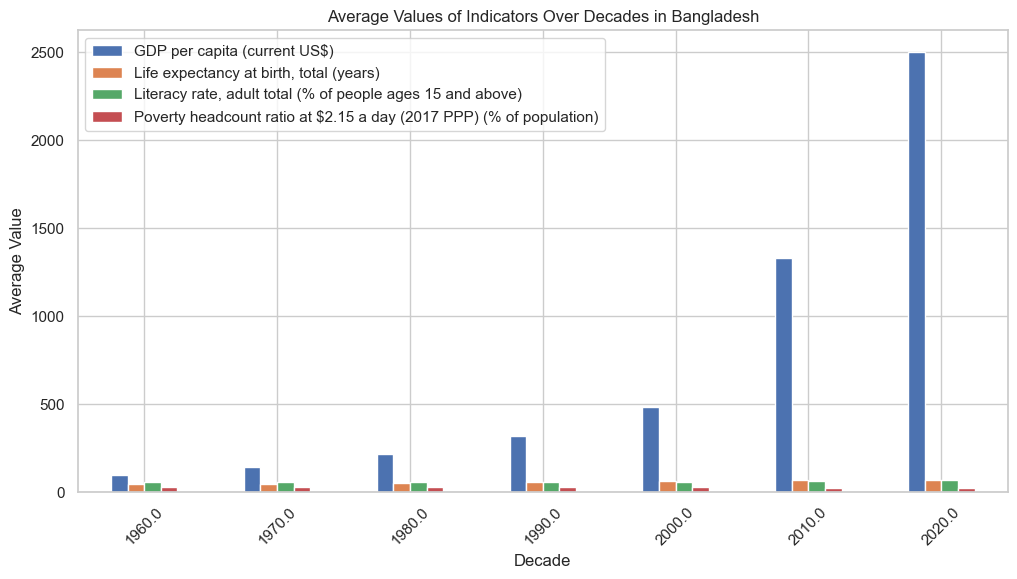

In [28]:
df_transformed['Decade'] = (df_transformed['Year'] // 10) * 10

df_decades = df_transformed.groupby('Decade')[indicators].mean()

df_decades.plot(kind='bar', figsize=(12, 6))
plt.title("Average Values of Indicators Over Decades in Bangladesh")
plt.ylabel("Average Value")
plt.xlabel("Decade")
plt.xticks(rotation=45)
plt.show()

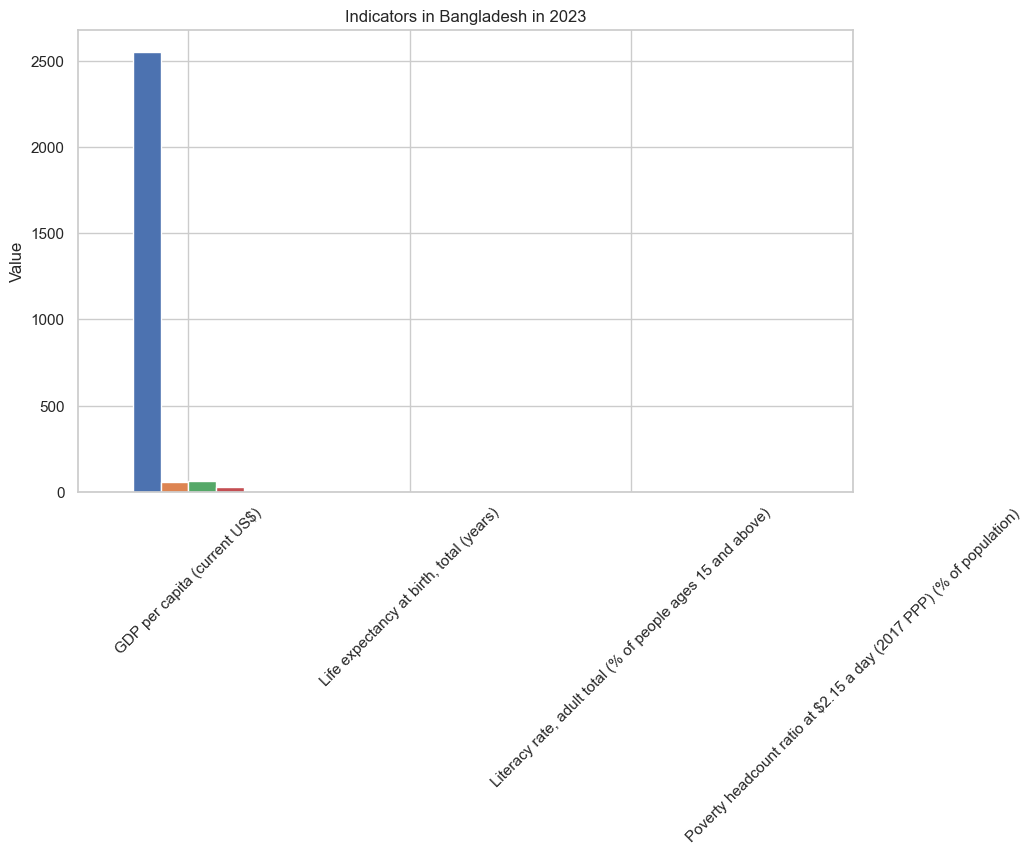

In [29]:
df_2023 = df_transformed[df_transformed["Year"] == 2023]

df_2023[indicators].plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Indicators in Bangladesh in 2023")
plt.ylabel("Value")
plt.xticks(range(len(indicators)), indicators, rotation=45)
plt.show()

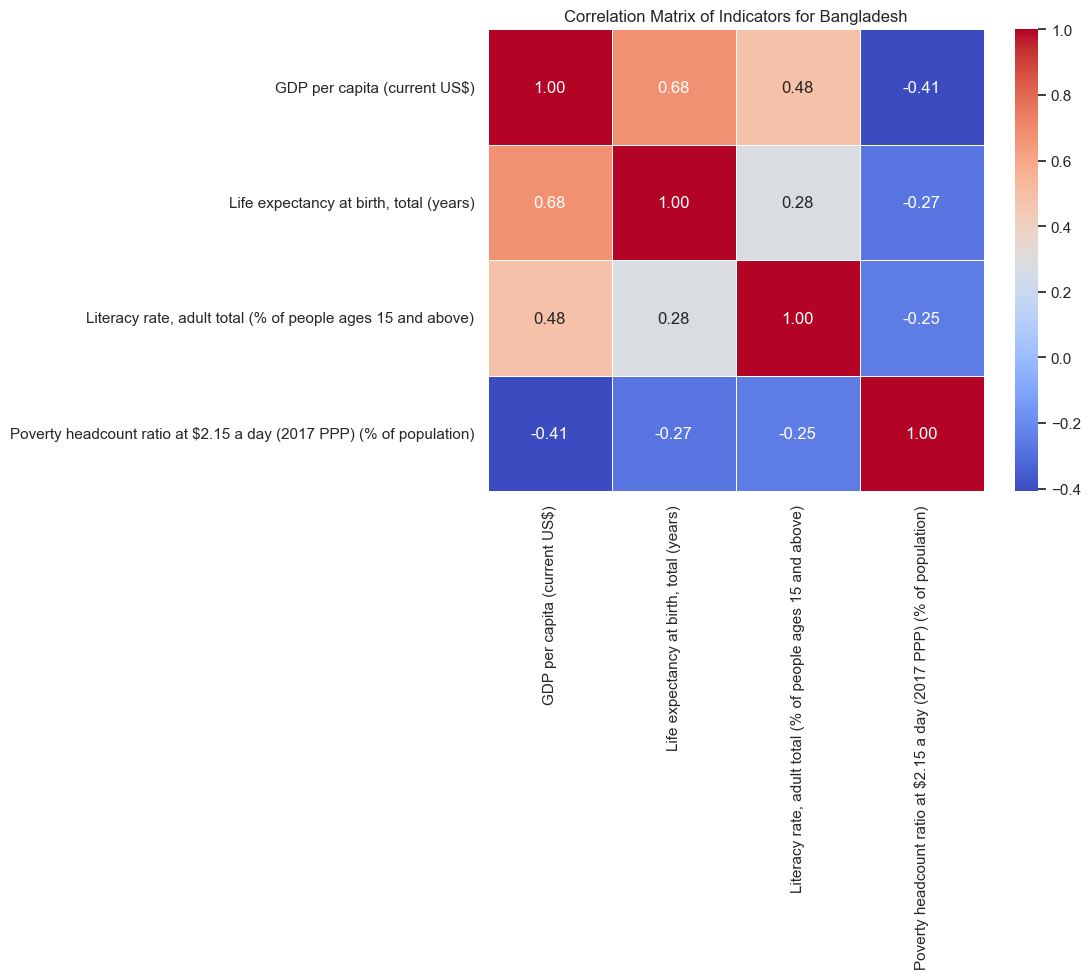

In [30]:
correlation_matrix = df_transformed[indicators].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Indicators for Bangladesh")
plt.show()

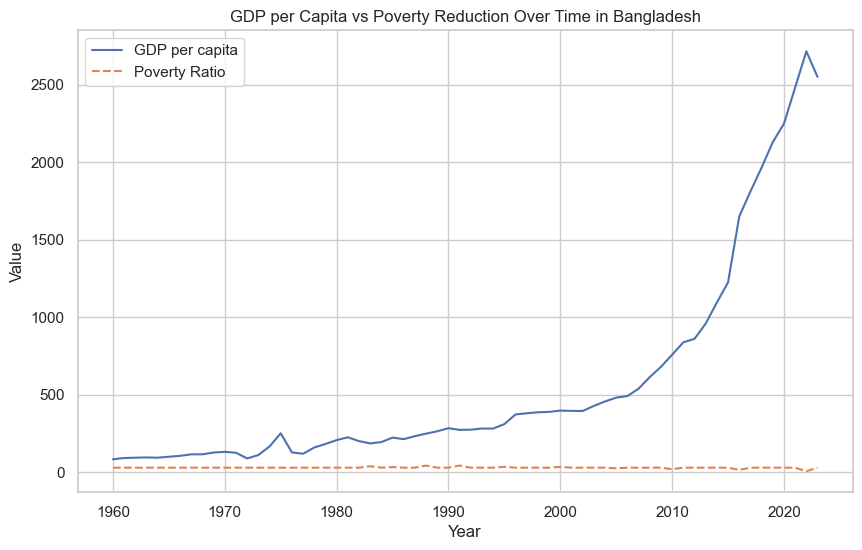

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(df_transformed["Year"], df_transformed["GDP per capita (current US$)"], label="GDP per capita")
plt.plot(df_transformed["Year"], df_transformed["Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"], label="Poverty Ratio", linestyle='--')

plt.title("GDP per Capita vs Poverty Reduction Over Time in Bangladesh")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

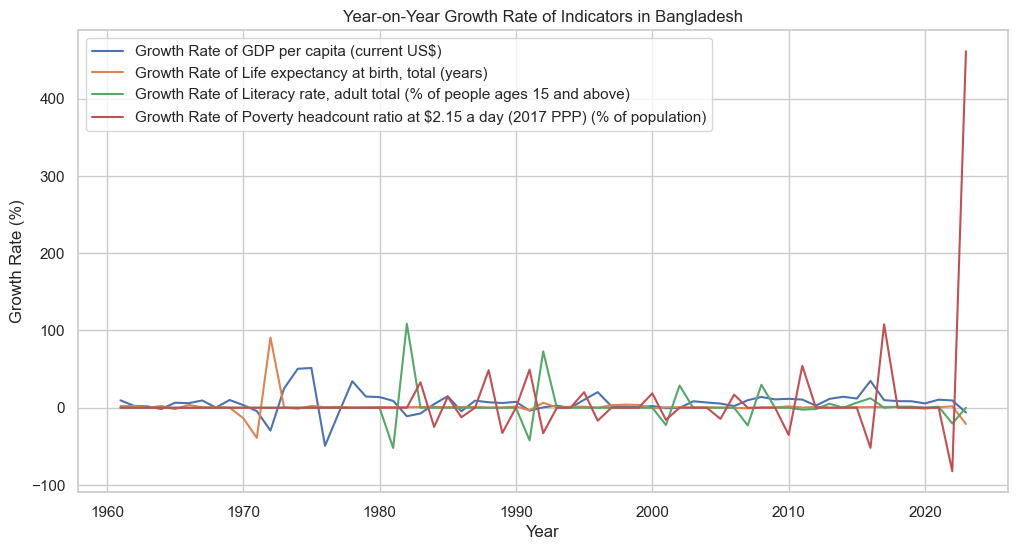

In [32]:
df_growth = df_transformed[indicators].pct_change() * 100

plt.figure(figsize=(12, 6))

for indicator in indicators:
    plt.plot(df_transformed["Year"][1:], df_growth[indicator][1:], label=f"Growth Rate of {indicator}")

plt.title("Year-on-Year Growth Rate of Indicators in Bangladesh")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.show()

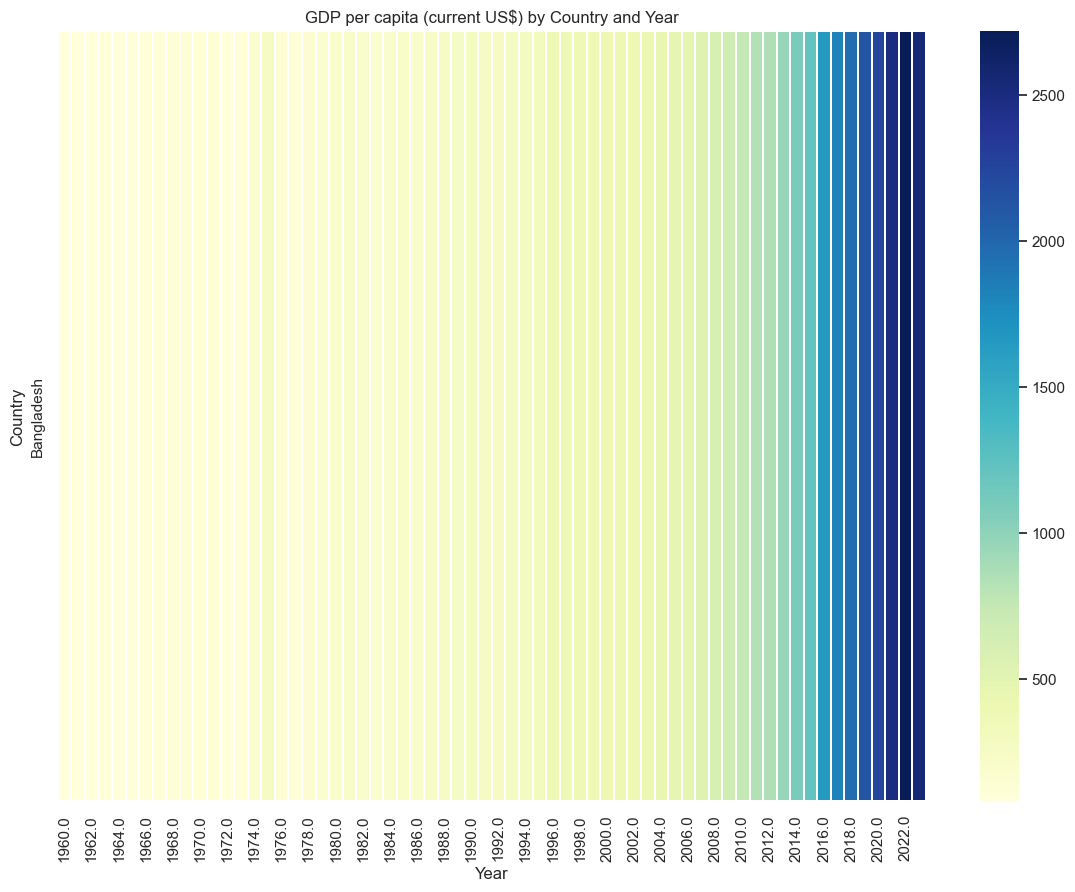

In [33]:
indicator = "GDP per capita (current US$)"
heat_df = df_long[df_long["Indicator Name"] == indicator].pivot(
    index="Country Name", columns="Year", values="Value"
)

plt.figure(figsize=(14, 10))
sns.heatmap(heat_df, cmap="YlGnBu", linewidths=0.2)
plt.title(f"{indicator} by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

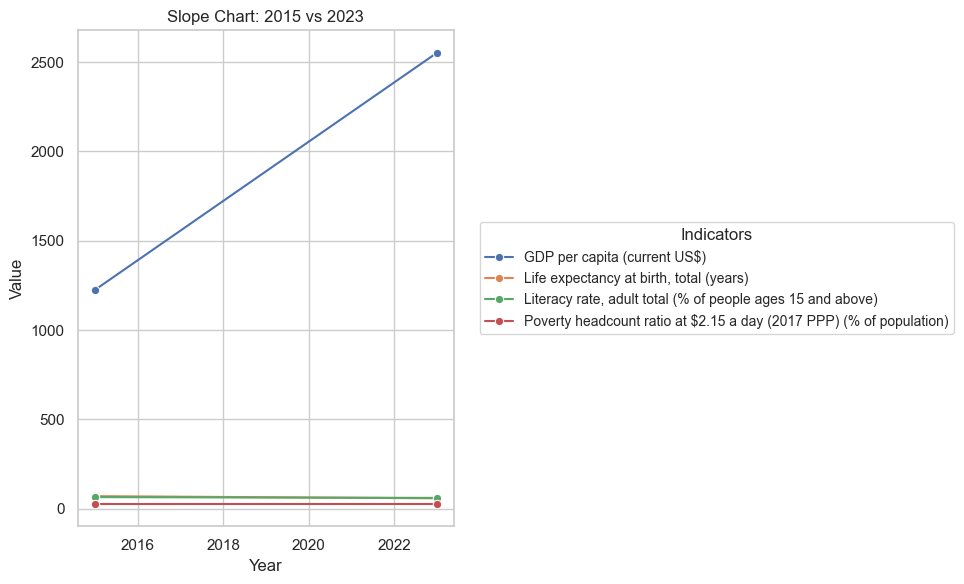

In [97]:
def plot_slope_chart(data, year1, year2):
    df_years = data[data['Year'].isin([year1, year2])]
    df_mean = df_years.groupby("Year")[indicators].mean().reset_index()
    df_melted = df_mean.melt(id_vars="Year", var_name="Indicator", value_name="Value")
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x="Year", y="Value", hue="Indicator", marker="o")
    plt.title(f"Slope Chart: {year1} vs {year2}")
    plt.legend(title="Indicators", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)
    plt.tight_layout()
    plt.show()

plot_slope_chart(df_transformed, 2015, 2023)

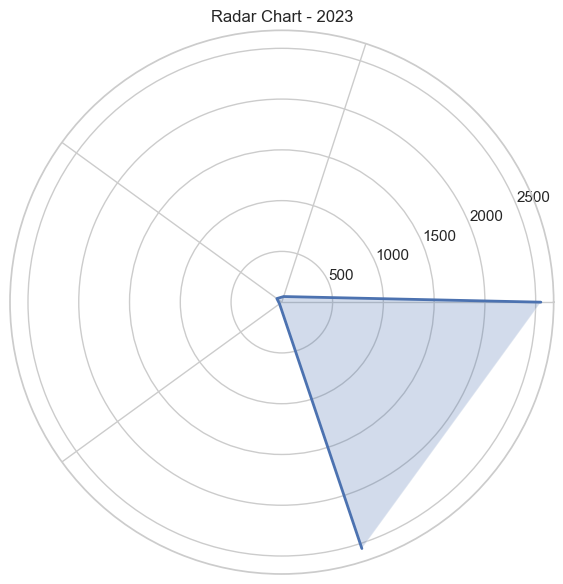

In [95]:
def plot_radar_chart(df_transformed, year):
    row = df_transformed[(df_transformed['Year'] == year)].mean(numeric_only=True)
    values = row[indicators].tolist()
    values += values[:1]
    labels = indicators + [indicators[0]]
    angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    
    label_offset = 1.15
    ax.set_xticklabels(indicators, fontsize=9, ha='center')
    
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_position((angles[i], label_offset))  
    
    plt.title(f"Radar Chart - {year}")
    plt.tight_layout()
    plt.show()

plot_radar_chart(df_transformed, 2023)